# QOSF Mentorship Program, Screening Task (Problem 1)

**Abstract:** I have used *Qiskit* to implement my solution. To find the optimum parameters for the circuit, I have used the *Constrained Optimization by Linear Approximation* (COBYLA) optimizer defined in the *Qiskit Aqua* module.

The idea is to transpile the circuit (given number of layers) only *once*, and then assign parameter values as and when required. This will cause a difference during the optimization phase for each value of the number of layers $L$, when several instances of the circuit have to be executed.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit import Aer,execute
from qiskit.circuit import Parameter
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.aqua.components.optimizers import COBYLA
import numpy as np
import matplotlib.pyplot as plt

## Constructing the state for $L$ layers with a general parameter $\theta$

In [2]:
def varstate(L):
    circuit = QuantumCircuit(4)
    theta = [[Parameter("t({},{})".format(i,j)) for j in range(4)] for i in range(L)]
    for i in range(L):
        #Odd block
        for j in range(4):
            circuit.rz(theta[i][j],j)
        for j in range(3):
            for k in range(j+1,4):
                circuit.cz(j,k)
        #Even block
        for j in range(4):
            circuit.rx(theta[i][j],j)
    transpiled_circuit = transpile(circuit)
    return transpiled_circuit,theta

## Construct and draw a sample circuit, also specify problem parameters

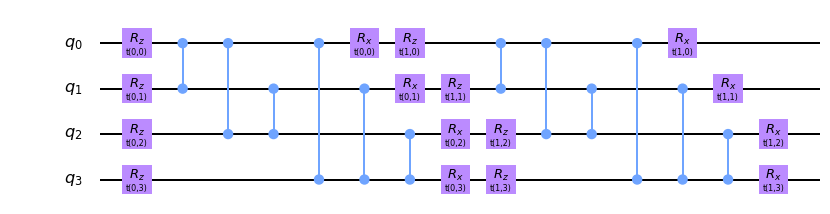

In [3]:
phi = random_statevector(2**4) #target state
L_max = 10 #maximum number of layers to test

#plot a sample circuit with 2 layers, while also declaring 2 global variables ;)
circuit,theta = varstate(2)
circuit.draw('mpl')

## Define the objective function to minimize

In [4]:
def objective(x):
    specific_circuit = circuit.assign_parameters({theta[i][j]:x[4*i+j] for i in range(L) for j in range(4)})
    psi = Statevector.from_label('0000')
    psi = psi.evolve(specific_circuit)
    return np.linalg.norm(psi.data-phi.data)**2

## Running the simulations for $L = 1$ to $L_{max}$

In [5]:
xaxis,yaxis = [],[]
for L in range(1,L_max+1):
    circuit,theta = varstate(L)
    init = np.random.rand(4*L)
    x_init = [x*np.pi*2 for x in init]
    optimizer = COBYLA(maxiter = 100,tol = 0.01) #vary max iterations and tolerations based on compute and time constraints
    ret = optimizer.optimize(num_vars = 4*L,objective_function = objective,initial_point = x_init)
    xaxis.append(L)
    yaxis.append(ret[1])

## Plotting the data

Text(0, 0.5, 'Distance between state and target state')

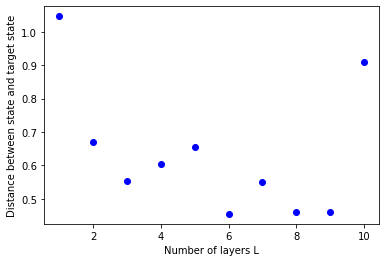

In [6]:
plt.plot(xaxis,yaxis,'bo')
plt.xlabel('Number of layers L')
plt.ylabel('Distance between state and target state')